In [ ]:
import tensorflow

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPool2D
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import load_model
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
!unzip /content/drive/MyDrive/dataset.zip

Archive:  /content/drive/MyDrive/dataset.zip
replace dataset/readme.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
train_ds = train_datagen.flow_from_directory('/content/dataset/train_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

test_ds = train_datagen.flow_from_directory('/content/dataset/test_set', target_size=(64, 64), class_mode='categorical', batch_size=5, color_mode='rgb')

Found 742 images belonging to 4 classes.
Found 198 images belonging to 4 classes.


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32,(3,3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,
                    steps_per_epoch = len(train_ds),
                    epochs = 20,
                    validation_data = test_ds,
                    validation_steps = len(test_ds))


Epoch 1/20
149/149 [==============================] - 32s 202ms/step - loss: 1.3070 - accuracy: 0.3747 - val_loss: 1.3257 - val_accuracy: 0.4798
Epoch 2/20
149/149 [==============================] - 33s 222ms/step - loss: 1.0431 - accuracy: 0.5620 - val_loss: 1.0239 - val_accuracy: 0.6263
Epoch 3/20
149/149 [==============================] - 30s 197ms/step - loss: 0.9126 - accuracy: 0.6321 - val_loss: 0.9364 - val_accuracy: 0.6970
Epoch 4/20
149/149 [==============================] - 28s 189ms/step - loss: 0.7796 - accuracy: 0.7075 - val_loss: 0.7495 - val_accuracy: 0.7475
Epoch 5/20
149/149 [==============================] - 28s 188ms/step - loss: 0.7124 - accuracy: 0.7143 - val_loss: 0.6993 - val_accuracy: 0.7273
Epoch 6/20
149/149 [==============================] - 27s 184ms/step - loss: 0.6351 - accuracy: 0.7480 - val_loss: 0.7260 - val_accuracy: 0.7172
Epoch 7/20
149/149 [==============================] - 27s 184ms/step - loss: 0.6335 - accuracy: 0.7493 - val_loss: 0.6758 - val_ac

In [ ]:
model.save('model.h5')

In [ ]:
result = model.evaluate(test_ds)

40/40 [==============================] - 4s 110ms/step - loss: 0.5093 - accuracy: 0.8030


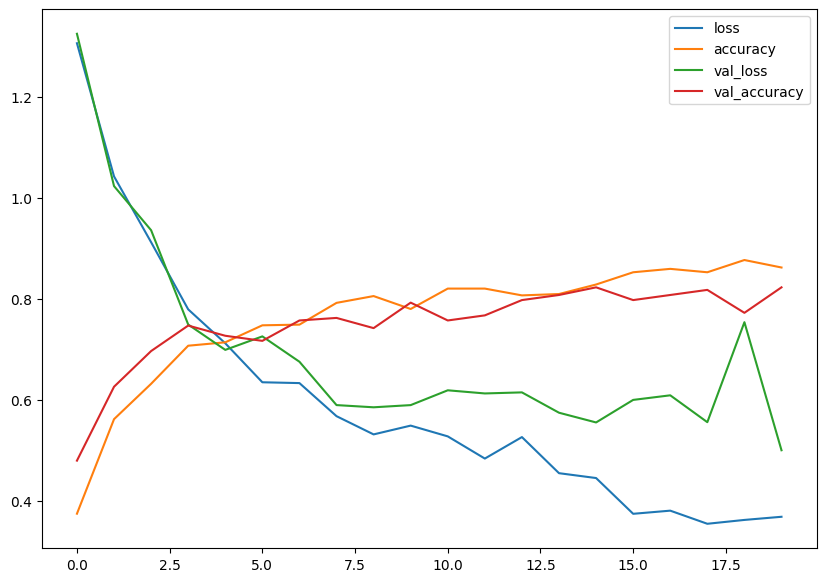

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(10, 7));

In [ ]:
import keras.utils as image

In [ ]:
model = load_model('model.h5')

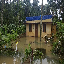

In [ ]:
img = image.load_img("/content/dataset/test_set/Flood/1015.jpg", target_size = (64, 64))
img

In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 140ms/step


array([2])

In [ ]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Flood', dtype='<U5')

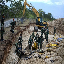

In [ ]:
img = image.load_img("/content/dataset/test_set/Earthquake/1327.jpg", target_size = (64, 64))
img


In [ ]:
x = image.img_to_array(img)
x = np.expand_dims(x, axis = 0)
pred = np.argmax(model.predict(x), axis=-1)
pred

1/1 [==============================] - 0s 29ms/step


array([1])

In [ ]:
index = ['Cyclone', 'Earthquake', 'Flood', 'WildFire']
result = np.array(index[pred[0]])
result

array('Earthquake', dtype='<U10')